In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
#from keras.layers import flatten
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
Train_dir="/content/drive/MyDrive/Mustard_dataset_original/mustard_dataset_resized"
Test_dir="/content/drive/MyDrive/Mustard_dataset_original/mustard_dubious_images"
print(len(Train_dir))
print(len(Test_dir))

71
70


In [ ]:
Train_gen=ImageDataGenerator(rescale=1./255,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=20,
                             fill_mode="nearest",
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=0.2,
                             shear_range=0.2)

In [ ]:
Test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
Train_data_gen=Train_gen.flow_from_directory(Train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=6,
                                             )

Found 255 images belonging to 9 classes.


In [ ]:
Test_data_gen=Test_gen.flow_from_directory(Test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=6,
                                             )

Found 45 images belonging to 9 classes.


In [ ]:
def plotImges(image_arr):
  fig , axes =plt.subplots(3,5, figsize=(20,20))
  axes =axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

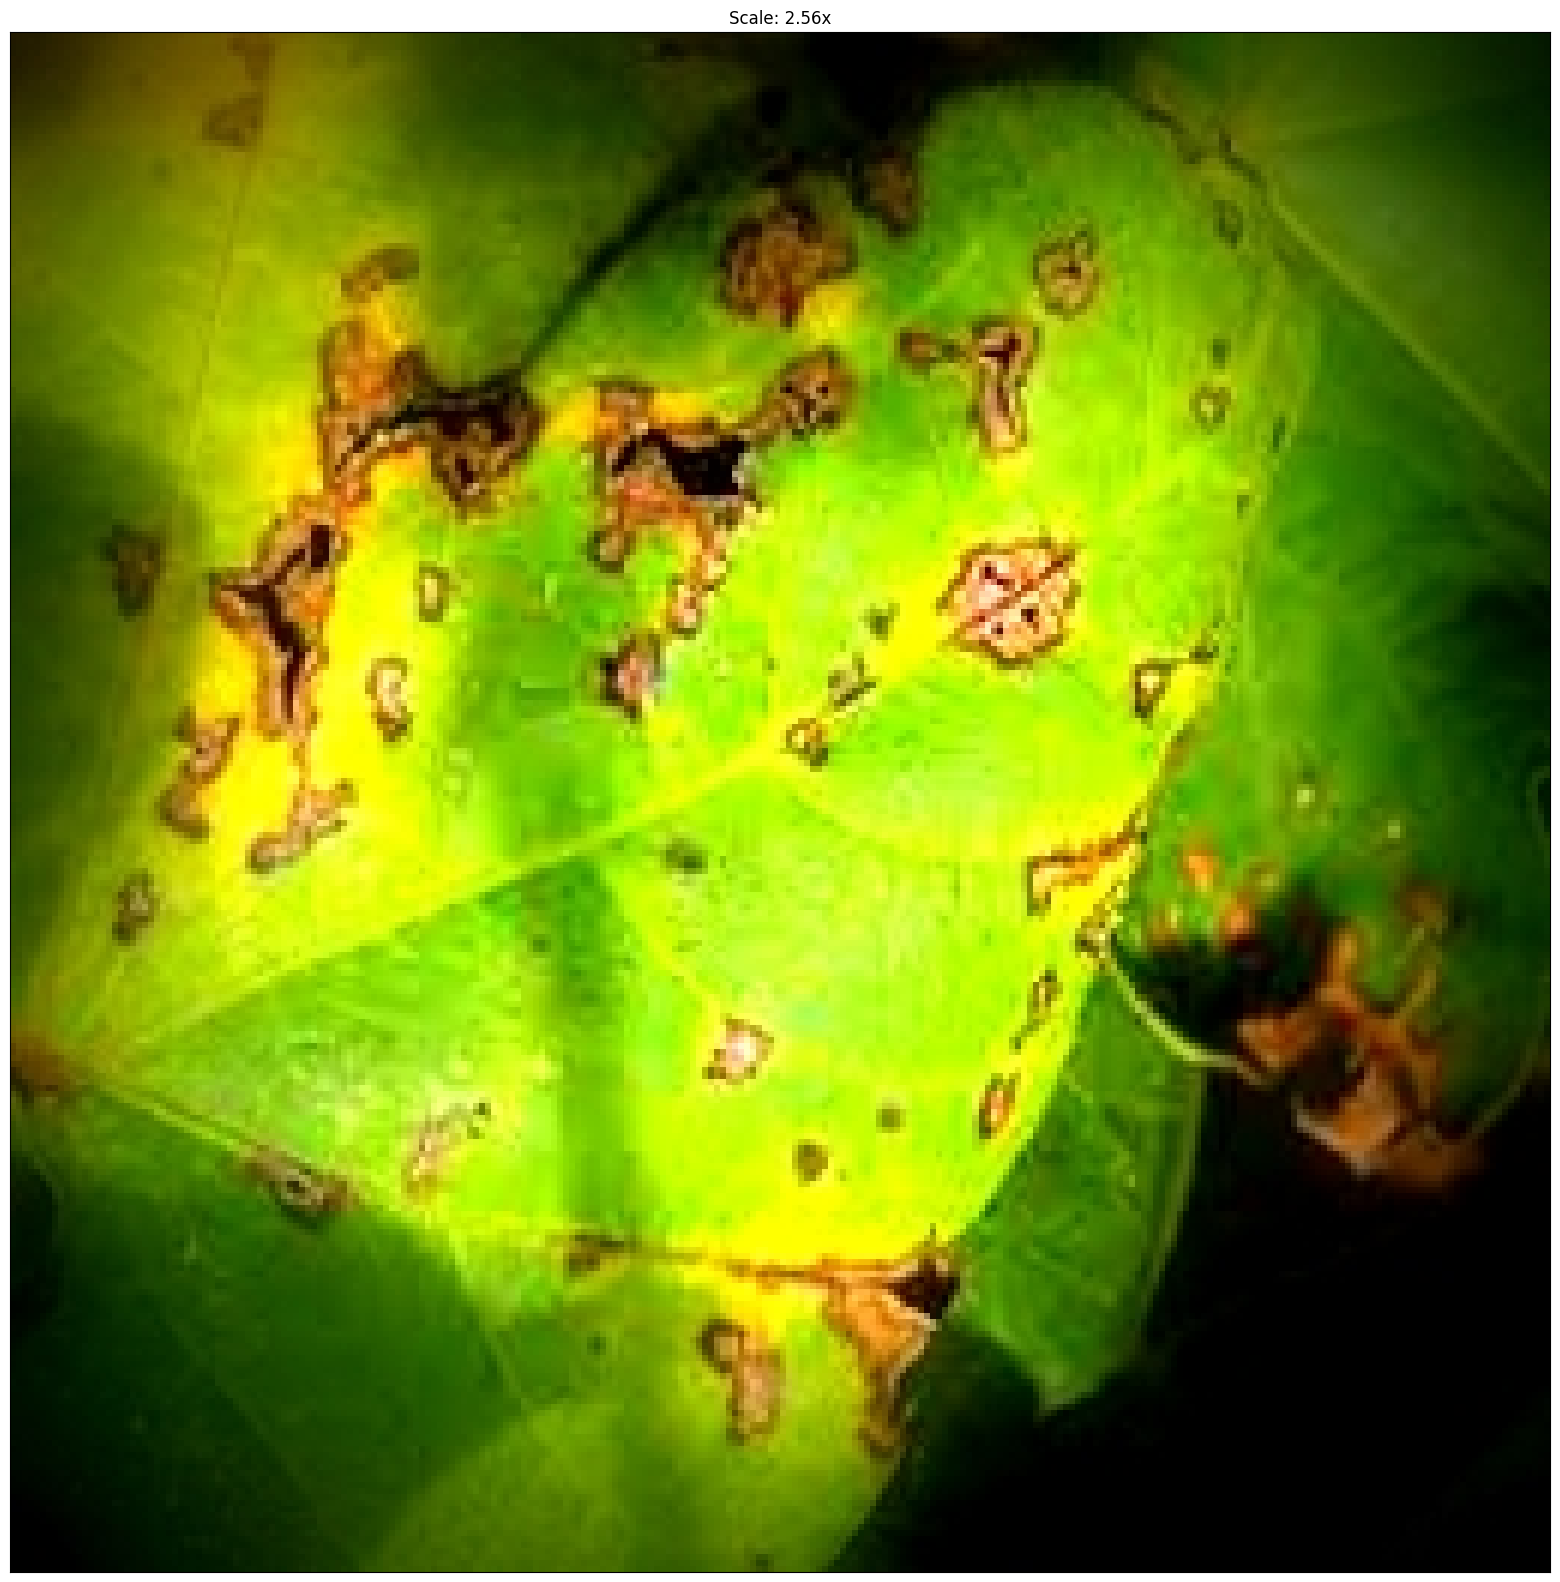

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get the list of all image paths in the folder
# Display all the images in the folder 'images'
image_paths = "/content/drive/MyDrive/Mustard_dataset_original/mustard_dubious_images/bacterial_blight/222.jpg"
fig = plt.figure(figsize=(20,20))

for i, image_path in enumerate(image_paths):
    image = mpimg.imread(image_paths)

    # Get the image size
    image_width, image_height = image.shape[1], image.shape[0]

    # Calculate the scale factor
    scale_factor = image_width / 100

    # Add the image to the figure
    #plt.subplot(len(image_paths) // 3 + 1, 3, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Add the scale to the subplot title
    plt.title(f'Scale: {scale_factor:.2f}x')

plt.show()

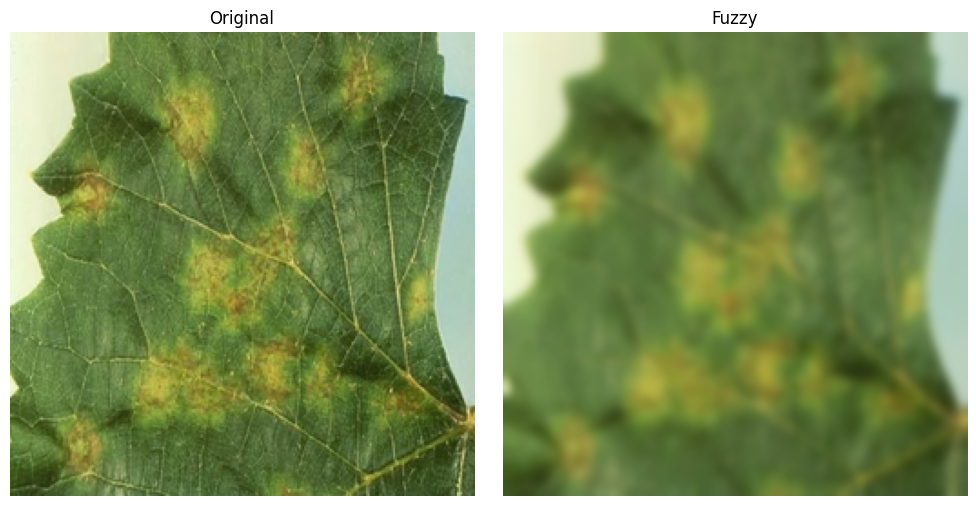

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Mustard_dataset_original/mustard_dubious_images/downy_mildew/444.JPG'
image = cv2.imread(image_path)

# Apply blurring filter
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Plot original and blurred images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')
#axes[1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Fuzzy')
axes[1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
images = [Train_data_gen[0][0][0] for i in range(5)]
plotImges(images)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vgg_model=Sequential()
vgg=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling="avg",
    classes=9,
    classifier_activation="softmax"
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg_model.layers:
  layer.trainable=False

In [ ]:
vgg_model.add(vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(553,activation="relu"))
vgg_model.add(Dense(9,activation="softmax"))

In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 553)               283689    
                                                                 
 dense_1 (Dense)             (None, 9)                 4986      
                                                                 
Total params: 15,003,363
Trainable params: 15,003,363
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class_names=Train_data_gen.class_indices
print(class_names)

{'alternaria_blight': 0, 'bacterial_blight': 1, 'downy_mildew': 2, 'healthy': 3, 'mustard_aphid': 4, 'mustard_leaf_miner': 5, 'mustard_saw_fly': 6, 'painted_bug': 7, 'white_rust': 8}


In [ ]:
li = list(class_names.keys())
print(li)

['alternaria_blight', 'bacterial_blight', 'downy_mildew', 'healthy', 'mustard_aphid', 'mustard_leaf_miner', 'mustard_saw_fly', 'painted_bug', 'white_rust']


In [ ]:
vgg_model.compile(optimizer=Adam(lr=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
Best_model=vgg_model.fit(Train_data_gen,
                               epochs=20,
                               verbose=1,
                               validation_data=Test_data_gen
)


Epoch 1/20
43/43 [==============================] - 124s 3s/step - loss: 2.1983 - accuracy: 0.1725 - val_loss: 2.2274 - val_accuracy: 0.1111
Epoch 2/20
43/43 [==============================] - 7s 157ms/step - loss: 2.1566 - accuracy: 0.2039 - val_loss: 2.2091 - val_accuracy: 0.1111
Epoch 3/20
43/43 [==============================] - 6s 135ms/step - loss: 2.1445 - accuracy: 0.2275 - val_loss: 2.2285 - val_accuracy: 0.1111
Epoch 4/20
43/43 [==============================] - 6s 130ms/step - loss: 2.1579 - accuracy: 0.2039 - val_loss: 2.2922 - val_accuracy: 0.1111
Epoch 5/20
43/43 [==============================] - 7s 159ms/step - loss: 2.0681 - accuracy: 0.2392 - val_loss: 2.1712 - val_accuracy: 0.1556
Epoch 6/20
43/43 [==============================] - 6s 130ms/step - loss: 2.0307 - accuracy: 0.2706 - val_loss: 2.0534 - val_accuracy: 0.2222
Epoch 7/20
43/43 [==============================] - 6s 131ms/step - loss: 1.9638 - accuracy: 0.2784 - val_loss: 2.1429 - val_accuracy: 0.2000
Epoch 8

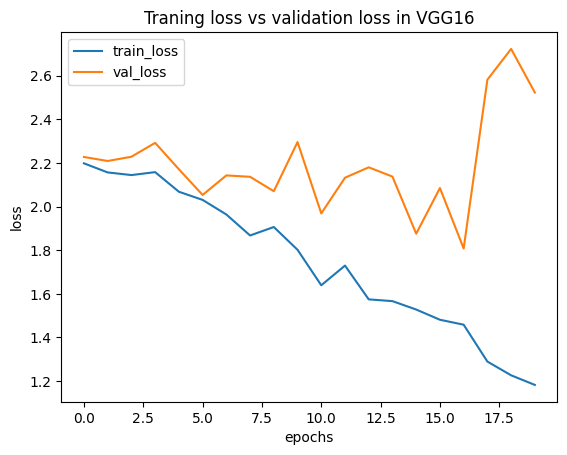

In [ ]:
   #plot the loss
plt.plot(Best_model.history["loss"] , label="train_loss")
plt.plot(Best_model.history["val_loss"] , label="val_loss")
plt.title("Traning loss vs validation loss in VGG16")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

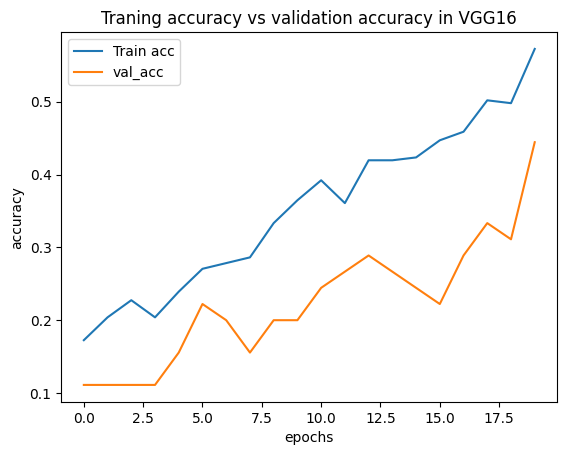

In [ ]:
plt.plot(Best_model.history["accuracy"], label="Train acc")
plt.plot(Best_model.history["val_accuracy"] , label="val_acc")
plt.title("Traning accuracy vs validation accuracy in VGG16")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/Mustard_dataset_original/mustard_dataset_resized/healthy/12.jpg")
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [ ]:
pred=vgg_model.predict(image)
print(pred)

1/1 [==============================] - 1s 832ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
output_class=li[np.argmax(pred)]
print("the predict class is output class", output_class)

the predict class is output class healthy


In [ ]:
vgg.save("/content/drive/MyDrive/My_All_Model/Mastered_model.h5")

In [ ]:
Mobilenet_model=Sequential()
Mobilenet=tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    pooling="avg",
    classes=9,
    classifier_activation="softmax"
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in Mobilenet_model.layers:
  layer.trainable=False

In [ ]:
Mobilenet_model.add(Mobilenet)
Mobilenet_model.add(Flatten())
Mobilenet_model.add(Dense(553,activation="relu"))
Mobilenet_model.add(Dense(9,activation="softmax"))

In [ ]:
Mobilenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 553)               566825    
                                                                 
 dense_3 (Dense)             (None, 9)                 4986      
                                                                 
Total params: 3,800,675
Trainable params: 3,778,787
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
Mobilenet_model.compile(optimizer=Adam(lr=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
class_names=Train_data_gen.class_indices
print(class_names)

{'alternaria_blight': 0, 'bacterial_blight': 1, 'downy_mildew': 2, 'healthy': 3, 'mustard_aphid': 4, 'mustard_leaf_miner': 5, 'mustard_saw_fly': 6, 'painted_bug': 7, 'white_rust': 8}


In [ ]:
li = list(class_names.keys())
print(li)

['alternaria_blight', 'bacterial_blight', 'downy_mildew', 'healthy', 'mustard_aphid', 'mustard_leaf_miner', 'mustard_saw_fly', 'painted_bug', 'white_rust']


In [ ]:
Best=Mobilenet_model.fit(Train_data_gen,
                               epochs=20,
                               verbose=1,
                               validation_data=Test_data_gen
)

Epoch 1/20
43/43 [==============================] - 10s 161ms/step - loss: 1.5250 - accuracy: 0.4980 - val_loss: 1.2269 - val_accuracy: 0.5778
Epoch 2/20
43/43 [==============================] - 5s 105ms/step - loss: 0.7665 - accuracy: 0.7686 - val_loss: 0.8155 - val_accuracy: 0.7111
Epoch 3/20
43/43 [==============================] - 5s 105ms/step - loss: 0.4536 - accuracy: 0.8902 - val_loss: 0.6097 - val_accuracy: 0.7778
Epoch 4/20
43/43 [==============================] - 6s 129ms/step - loss: 0.3648 - accuracy: 0.9020 - val_loss: 0.6697 - val_accuracy: 0.8222
Epoch 5/20
43/43 [==============================] - 5s 105ms/step - loss: 0.4484 - accuracy: 0.8784 - val_loss: 0.9029 - val_accuracy: 0.7556
Epoch 6/20
43/43 [==============================] - 6s 138ms/step - loss: 0.2711 - accuracy: 0.9216 - val_loss: 0.4639 - val_accuracy: 0.8667
Epoch 7/20
43/43 [==============================] - 4s 104ms/step - loss: 0.2659 - accuracy: 0.9059 - val_loss: 0.5677 - val_accuracy: 0.8889
Epoch

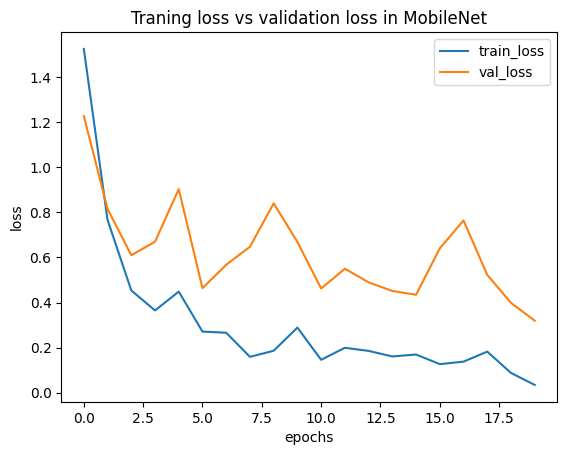

In [ ]:
plt.plot(Best.history["loss"] , label="train_loss")
plt.plot(Best.history["val_loss"] , label="val_loss")
plt.title("Traning loss vs validation loss in MobileNet")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

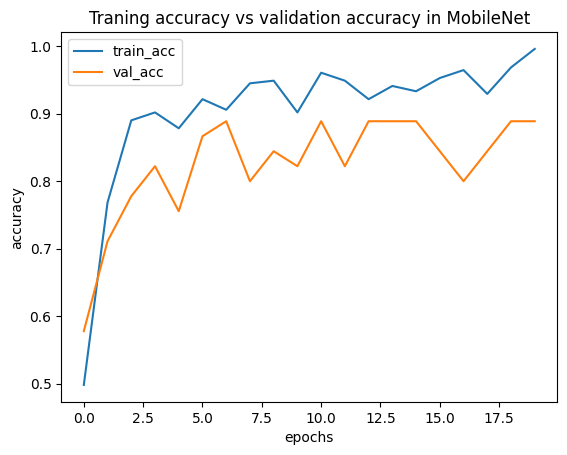

In [ ]:
plt.plot(Best.history["accuracy"] , label="train_acc")
plt.plot(Best.history["val_accuracy"] , label="val_acc")
plt.title("Traning accuracy vs validation accuracy in MobileNet")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/Mustard_dataset_original/mustard_dubious_images/healthy/222.jpg")
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [ ]:
y_pred = Mobilenet_model.predict(Test_data_gen)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = Test_data_gen.classes

# Get the class labels
class_labels = list(Test_data_gen.class_indices.keys())

# Compute the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels)

# Print the classification report
print(report)


8/8 [==============================] - 1s 33ms/step
                    precision    recall  f1-score   support

 alternaria_blight       0.00      0.00      0.00         5
  bacterial_blight       0.00      0.00      0.00         5
      downy_mildew       0.17      0.20      0.18         5
           healthy       0.17      0.20      0.18         5
     mustard_aphid       0.50      0.40      0.44         5
mustard_leaf_miner       0.00      0.00      0.00         5
   mustard_saw_fly       0.20      0.20      0.20         5
       painted_bug       0.20      0.20      0.20         5
        white_rust       0.14      0.20      0.17         5

          accuracy                           0.16        45
         macro avg       0.15      0.16      0.15        45
      weighted avg       0.15      0.16      0.15        45



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
#
# Get the predictions
#
y_pred = Mobilenet_model.predict(Test_data_gen)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = Test_data_gen.classes
#class_labels = list(Test_data_gen.class_indices.keys())
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Test_data_gen, y_pred=class_labels)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

8/8 [==============================] - 0s 31ms/step


ValueError: ignored

In [ ]:
pred=Mobilenet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 956ms/step
[[1.7315617e-05 9.6969106e-06 9.9947542e-01 1.3663845e-05 1.9285962e-04
  1.6333508e-04 6.1819359e-05 3.0303321e-05 3.5533983e-05]]


In [ ]:
output_class=li[np.argmax(pred)]
print("the predict class is output class", output_class)

the predict class is output class downy_mildew


In [ ]:
Mobilenet.save("/content/drive/MyDrive/My_All_Model/Mustard_model.h5")

In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
Inception_model=Sequential()
InceptionV3=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(299,299,3),
    pooling="avg",
    classifier_activation="softmax",
)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in Inception_model.layers:
  layer.trainable=False

In [ ]:
Inception_model.add(InceptionV3)
Inception_model.add(Flatten())
Inception_model.add(Dense(553,activation="relu"))
Inception_model.add(Dense(9,activation="softmax"))

In [ ]:
Inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 553)               1133097   
                                                                 
 dense_5 (Dense)             (None, 9)                 4986      
                                                                 
Total params: 22,940,867
Trainable params: 22,906,435
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
Inception_model.compile(optimizer=Adam(lr=0.0001) , loss="sparse_categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
My_model=Inception_model.fit(Train_data_gen,
                    epochs=20,
                    verbose=1,
                    validation_data=Test_data_gen
)

Epoch 1/20
43/43 [==============================] - 33s 367ms/step - loss: 1.7159 - accuracy: 0.4000 - val_loss: 0.9706 - val_accuracy: 0.5778
Epoch 2/20
43/43 [==============================] - 6s 137ms/step - loss: 0.8264 - accuracy: 0.7333 - val_loss: 0.5433 - val_accuracy: 0.8222
Epoch 3/20
43/43 [==============================] - 6s 127ms/step - loss: 0.6843 - accuracy: 0.7608 - val_loss: 0.4194 - val_accuracy: 0.9111
Epoch 4/20
43/43 [==============================] - 5s 115ms/step - loss: 0.5448 - accuracy: 0.8078 - val_loss: 0.5268 - val_accuracy: 0.7778
Epoch 5/20
43/43 [==============================] - 6s 150ms/step - loss: 0.4689 - accuracy: 0.8471 - val_loss: 0.3577 - val_accuracy: 0.8889
Epoch 6/20
43/43 [==============================] - 5s 122ms/step - loss: 0.5450 - accuracy: 0.8314 - val_loss: 0.3392 - val_accuracy: 0.8667
Epoch 7/20
43/43 [==============================] - 5s 112ms/step - loss: 0.3376 - accuracy: 0.8902 - val_loss: 0.3557 - val_accuracy: 0.8667
Epoch

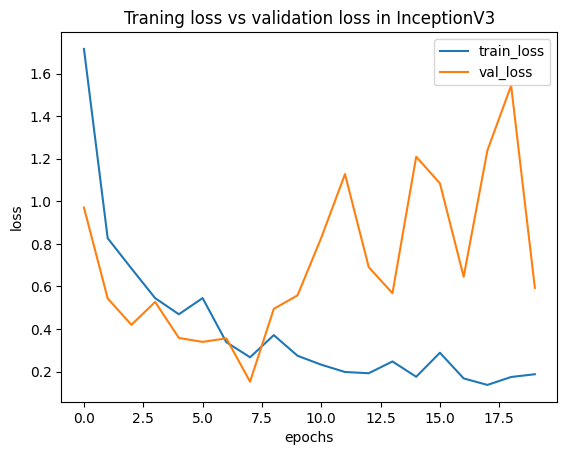

In [ ]:
plt.plot(My_model.history["loss"] , label="train_loss")
plt.plot(My_model.history["val_loss"] , label="val_loss")
plt.title("Traning loss vs validation loss in InceptionV3")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

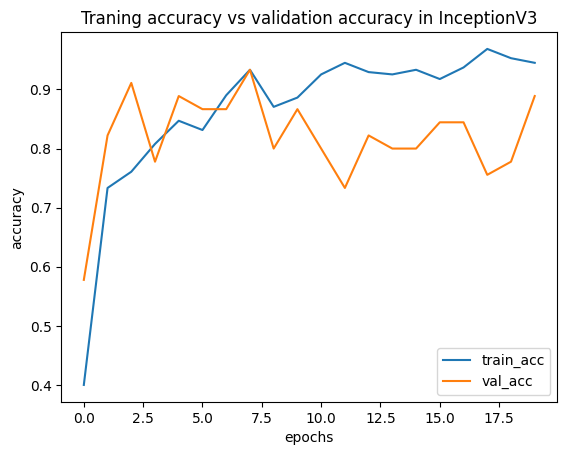

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(My_model.history["accuracy"] , label="train_acc")
plt.plot(My_model.history["val_accuracy"] , label="val_acc")
plt.title("Traning accuracy vs validation accuracy in InceptionV3")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig("accuracy")

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/Mustard_dataset_original/mustard_dataset_resized/healthy/16.jpg")
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [ ]:
# Generate predictions using the trained model on the test data
y_pred = Inception_model.predict(Test_data_gen)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = Test_data_gen.classes

# Get the class labels
class_labels = list(Test_data_gen.class_indices.keys())

# Compute the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels)

# Print the classification report
print(report)


8/8 [==============================] - 1s 34ms/step
                    precision    recall  f1-score   support

 alternaria_blight       0.40      0.40      0.40         5
  bacterial_blight       0.25      0.20      0.22         5
      downy_mildew       0.00      0.00      0.00         5
           healthy       0.00      0.00      0.00         5
     mustard_aphid       0.00      0.00      0.00         5
mustard_leaf_miner       0.00      0.00      0.00         5
   mustard_saw_fly       0.00      0.00      0.00         5
       painted_bug       0.20      0.20      0.20         5
        white_rust       0.00      0.00      0.00         5

          accuracy                           0.09        45
         macro avg       0.09      0.09      0.09        45
      weighted avg       0.09      0.09      0.09        45



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = Inception_model.predict(Test_data_gen)

y_pred_labels = np.argmax(y_pred, axis=0)

y_true_labels = Test_data_gen.classes

class_labels = list(Test_data_gen.class_indices.keys())

plt.figure(figsize=(10,6))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_true_labels, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
#pd.DataFrame(confusion_matrix(y_true_labels, y_pred_labels))


2/2 [==============================] - 6s 1s/step


,0,1,2,3,4,5,6,7,8
0,0,0,2,0,1,1,1,0,0
1,1,0,0,2,0,0,1,0,1
2,0,1,1,1,0,1,0,1,0
3,0,1,2,0,0,0,1,0,1
4,0,2,0,1,0,1,0,0,1
5,1,1,0,0,1,1,0,1,0
6,0,1,0,0,0,0,1,1,2
7,0,0,1,1,1,1,0,1,0
8,0,0,1,0,2,0,1,1,0


<Figure size 1000x600 with 0 Axes>

In [ ]:
pred=Mobilenet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 67ms/step
[[8.95255071e-04 6.19547861e-03 8.97859991e-01 5.54619962e-03
  1.00720525e-02 3.52130942e-02 8.69569089e-03 5.41620050e-03
  3.01061217e-02]]


In [ ]:
output_class=li[np.argmax(pred)]
print("the predict class is output class", output_class)

the predict class is output class downy_mildew


In [ ]:
InceptionV3.save("/content/drive/MyDrive/My_All_Model/Mastered_inception_model.h5")